# WeatherPy
----


### H3 WeatherPy Analysis

   * Both scatter and linear regression plots show that there is a strong correlation between Latitude and temperature. As we  approach latitude zero, the temperature increases. The max. temperatures for more cities shown between Latitude 20 and 40 is due to summer season in Northern hemisphere at this time of the year.
   * There is no relation between latitude and Humidity. But the humidity is higher (above 60) for more cities across both the hemispheres as these plots are taken in July.
   * Also there is no correlation between latitude & Cloudiness and latitude & Wind Speed. Wind Speed is generally between 0 and 15 mph regardless of latitude​.   

In [5]:
#pip install citipy

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
Tot_No_of_cities = len(cities)
print(Tot_No_of_cities)


636


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

cityCounter = 0
loopCounter = 1

print("Beginning Data Retrieval")
print("-----------------------------")
               
for city in cities:
   
      
    response = requests.get(query_url + city).json()
    #pprint(response) 

    try:
        pprint(f"Processing Record of {cityCounter} of Set {loopCounter} | {city}")
        
        City.append(response["name"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])            
     
    except:            
        pprint(f"City not found. Skipping... ")
    
    #incrementing the city counter by 1
    cityCounter += 1
    
    #Resetting the city counter and incrementing the set counter
    if cityCounter == 50:
        cityCounter = 0
        loopCounter += 1
        time.sleep(5)
    
print("-----------------------------")                
print("Data Retrieval Complete")      
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
'Processing Record of 0 of Set 1 | hovd'
'Processing Record of 1 of Set 1 | aklavik'
'Processing Record of 2 of Set 1 | hermanus'
'Processing Record of 3 of Set 1 | georgetown'
'Processing Record of 4 of Set 1 | provideniya'
'Processing Record of 5 of Set 1 | new norfolk'
'Processing Record of 6 of Set 1 | tasiilaq'
'Processing Record of 7 of Set 1 | lorengau'
'Processing Record of 8 of Set 1 | meyungs'
'City not found. Skipping... '
'Processing Record of 9 of Set 1 | korla'
'Processing Record of 10 of Set 1 | tiksi'
'Processing Record of 11 of Set 1 | uglegorsk'
'Processing Record of 12 of Set 1 | luderitz'
'Processing Record of 13 of Set 1 | mar del plata'
'Processing Record of 14 of Set 1 | isangel'
'Processing Record of 15 of Set 1 | barentsburg'
'City not found. Skipping... '
'Processing Record of 16 of Set 1 | jamestown'
'Processing Record of 17 of Set 1 | qaanaaq'
'Processing Record of 18 of Set 1 | vaini'
'Processing Record

'Processing Record of 17 of Set 4 | znamenka'
'Processing Record of 18 of Set 4 | sao filipe'
'Processing Record of 19 of Set 4 | port elizabeth'
'Processing Record of 20 of Set 4 | sault sainte marie'
'Processing Record of 21 of Set 4 | vindeby'
'Processing Record of 22 of Set 4 | broome'
'Processing Record of 23 of Set 4 | namwala'
'Processing Record of 24 of Set 4 | cassilandia'
'Processing Record of 25 of Set 4 | ribeira grande'
'Processing Record of 26 of Set 4 | elliot lake'
'Processing Record of 27 of Set 4 | vostok'
'Processing Record of 28 of Set 4 | bambous virieux'
'Processing Record of 29 of Set 4 | saint anthony'
'Processing Record of 30 of Set 4 | oriximina'
'Processing Record of 31 of Set 4 | east london'
'Processing Record of 32 of Set 4 | bonavista'
'Processing Record of 33 of Set 4 | catamarca'
'Processing Record of 34 of Set 4 | coahuayana'
'Processing Record of 35 of Set 4 | tevaitoa'
'Processing Record of 36 of Set 4 | hagere hiywet'
'Processing Record of 37 of Set

'Processing Record of 35 of Set 7 | matara'
'Processing Record of 36 of Set 7 | vila velha'
'Processing Record of 37 of Set 7 | piotrkow trybunalski'
'Processing Record of 38 of Set 7 | nuevo progreso'
'Processing Record of 39 of Set 7 | pierre'
'Processing Record of 40 of Set 7 | celestun'
'Processing Record of 41 of Set 7 | hasaki'
'Processing Record of 42 of Set 7 | yerbogachen'
'Processing Record of 43 of Set 7 | paamiut'
'Processing Record of 44 of Set 7 | kruisfontein'
'Processing Record of 45 of Set 7 | amderma'
'City not found. Skipping... '
'Processing Record of 46 of Set 7 | kaitangata'
'Processing Record of 47 of Set 7 | fengzhen'
'Processing Record of 48 of Set 7 | kontagora'
'Processing Record of 49 of Set 7 | verkhnyaya inta'
'Processing Record of 0 of Set 8 | kazachinskoye'
'Processing Record of 1 of Set 8 | grand centre'
'City not found. Skipping... '
'Processing Record of 2 of Set 8 | kenora'
'Processing Record of 3 of Set 8 | seoul'
'Processing Record of 4 of Set 8 | 

'Processing Record of 48 of Set 10 | marquette'
'Processing Record of 49 of Set 10 | kuala terengganu'
'Processing Record of 0 of Set 11 | sulangan'
'Processing Record of 1 of Set 11 | panjab'
'Processing Record of 2 of Set 11 | chapais'
'Processing Record of 3 of Set 11 | boca do acre'
'Processing Record of 4 of Set 11 | port hawkesbury'
'Processing Record of 5 of Set 11 | poronaysk'
'Processing Record of 6 of Set 11 | plettenberg bay'
'Processing Record of 7 of Set 11 | san policarpo'
'Processing Record of 8 of Set 11 | buraydah'
'Processing Record of 9 of Set 11 | orsk'
'Processing Record of 10 of Set 11 | uyemskiy'
'Processing Record of 11 of Set 11 | el dorado'
'Processing Record of 12 of Set 11 | novobirilyussy'
'Processing Record of 13 of Set 11 | lazaro cardenas'
'Processing Record of 14 of Set 11 | trairi'
'Processing Record of 15 of Set 11 | bam'
'Processing Record of 16 of Set 11 | yulara'
'Processing Record of 17 of Set 11 | evreux'
'Processing Record of 18 of Set 11 | bada

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Convert to DataFrame
weather_dict = {
    "City": City,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country,
    "Date": Date
}
weather_checkDF = pd.DataFrame(weather_dict)
weather_checkDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khovd,48.0056,91.6419,64.00,33,4,4.27,MN,1658888140
1,Aklavik,68.2191,-135.0107,64.96,32,100,20.49,CA,1658888141
2,Hermanus,-34.4187,19.2345,54.43,85,46,1.79,ZA,1658888141
3,George Town,5.4112,100.3354,84.13,79,20,4.61,MY,1658887851
4,Provideniya,64.3833,-173.3000,51.91,66,0,20.13,RU,1658888141


In [10]:
#weather_checkDF.to_csv("output_data/weatherdata.csv", index = False)
weather_checkDF.to_csv(output_data_file,index=False)
weather_checkDF.head(5)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khovd,48.0056,91.6419,64.00,33,4,4.27,MN,1658888140
1,Aklavik,68.2191,-135.0107,64.96,32,100,20.49,CA,1658888141
2,Hermanus,-34.4187,19.2345,54.43,85,46,1.79,ZA,1658888141
3,George Town,5.4112,100.3354,84.13,79,20,4.61,MY,1658887851
4,Provideniya,64.3833,-173.3000,51.91,66,0,20.13,RU,1658888141


In [11]:
weather_checkDF.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [12]:
#weather_checkDF = pd.read_csv(output_data_file)
#weather_checkDF.head(10)

In [13]:
weather_checkDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.00000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,21.22702,16.456440,69.139113,72.267826,57.953043,7.607913,1.658888e+09
std,33.16856,93.034741,13.082666,20.431357,40.161688,5.329459,9.450251e+01
min,-54.80000,-179.166700,32.110000,10.000000,0.000000,0.000000,1.658888e+09
25%,-5.06985,-65.443750,59.550000,63.000000,13.500000,3.440000,1.658888e+09
50%,26.32600,19.703200,70.300000,77.000000,74.000000,6.260000,1.658888e+09
75%,49.15180,100.080200,79.215000,87.500000,100.000000,10.760000,1.658888e+09
max,78.21860,179.316700,106.840000,100.000000,100.000000,26.510000,1.658888e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#Check if max of Humidity > 100
if weather_checkDF["Humidity"].max() > 100:
    Humidity_revisedData = weather_checkDF.loc[weather_checkDF["Humidity"] <= 100]
    Humidity_revisedData.describe()
    

In [15]:
#  Get the indices of cities that have humidity over 100%
Humidity100_index = weather_checkDF.index[weather_checkDF["Humidity"] > 100]
Humidity100_index

Int64Index([], dtype='int64')

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_checkDF.drop(Humidity100_index, inplace=False )
clean_city_data.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khovd,48.0056,91.6419,64.00,33,4,4.27,MN,1658888140
1,Aklavik,68.2191,-135.0107,64.96,32,100,20.49,CA,1658888141
2,Hermanus,-34.4187,19.2345,54.43,85,46,1.79,ZA,1658888141
3,George Town,5.4112,100.3354,84.13,79,20,4.61,MY,1658887851
4,Provideniya,64.3833,-173.3000,51.91,66,0,20.13,RU,1658888141


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

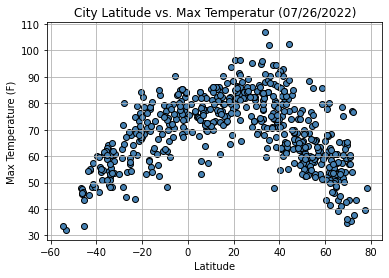

In [17]:
# Scatter plat of Latitude vs. Temperature
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"], facecolor='steelblue', edgecolor='black')

#today's date
today = pd.to_datetime("today").strftime("%m/%d/%Y")

plt.title(f"City Latitude vs. Max Temperatur ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(which='major', linestyle='-')

#saving the scatter plot to a .png file
plt.savefig("output_data/LatVsTemp_scatter_plot.png")
plt.show()

### Latitude vs Temperature Scatter Plot Insights

This scatter plot maps the latitude Vs Maximum temperature of randomly selected cities within the latitude range between -90 and 90 and longitude range between -180 and 180.

It shows that the temperature increases as we approach equator(latitude 0). The max. temperatures between Latitude 20 and 40 is due to summer season in Northern hemisphere.(This plot is taken in Jul which is summer for northern hemisphere).


## Latitude vs. Humidity Plot

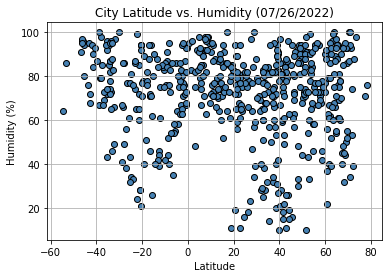

In [18]:
# Scatter plat of Latitude vs. Humidity
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], facecolor='steelblue', edgecolor='black')

#today's date
today = pd.to_datetime("today").strftime("%m/%d/%Y")

plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(which='major', linestyle='-')

#saving the scatter plot to a .png file
plt.savefig("output_data/LatVsHumidity_scatter_plot.png")
plt.show()

### Latitude vs Humidity Scatter Plot Insights

This scatter plot maps the latitude Vs Humidity for randomly selected 500+ cities.
It shows that there is no relationship between Latitude and Humidity. Since this plot is taken in July, the Humidity is higher for more cities across both the hemispheres.

## Latitude vs. Cloudiness Plot

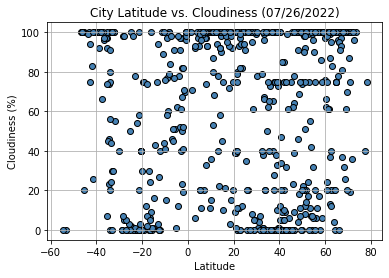

In [19]:
# Scatter plat of Latitude vs. Cloudiness
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], facecolor='steelblue', edgecolor='black')

#today's date
today = pd.to_datetime("today").strftime("%m/%d/%Y")

plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(which='major', linestyle='-')

#saving the scatter plot to a .png file
plt.savefig("output_data/LatVsCloudiness_scatter_plot.png")
plt.show()

### Latitude vs Cloudiness Scatter Plot Insights

This scatter plot shows that there is no particular relation between latitude and cloudiness for the ramdomly selected 500+ cities.

## Latitude vs. Wind Speed Plot

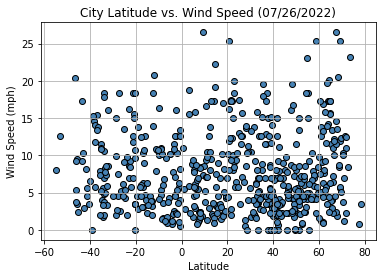

In [20]:
# Scatter plat of Latitude vs. Wind Speed
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], facecolor='steelblue', edgecolor='black')

#today's date
today = pd.to_datetime("today").strftime("%m/%d/%Y")

plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(which='major', linestyle='-')

#saving the scatter plot to a .png file
plt.savefig("output_data/LatVsWindSpeed_scatter_plot.png")
plt.show()

### Latitude vs Wind Speed Scatter Plot Insights

This scatter plot shows that there is no particular relation between Latitude and Wind speed for the ramdomly selected 500+ cities.

## Linear Regression

In [21]:
#create DataFrames for Northern and Southern Hemisphere
Northern_Hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
Southern_Hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

In [22]:
# Create a function for linear regression and scatter plot

def linear_regression(x,y):
    #Calculate r-value
    correlation = st.pearsonr(x,y)
    print(f"The r-value is: {correlation[0]}")

    # Add the linear regression equation and line to plot

    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    
    return line_equation

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6241913219142132


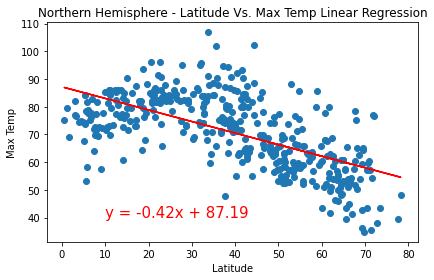

In [23]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Latitude Vs. Max Temp Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig("output_data/North_LatVsMaxTemp_regression_plot.png")
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7778804361175362


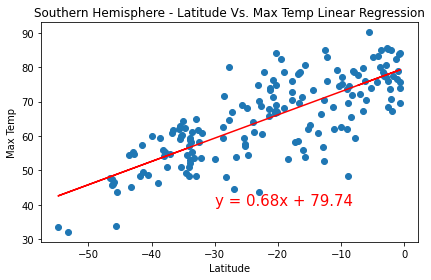

In [24]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Max Temp"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude Vs. Max Temp Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig("output_data/South_LatVsMaxTemp_regression_plot.png")
plt.tight_layout()
plt.show()

### North & Southern Hemispheres - Max Temp vs. Latitude Linear Regression Insights

The regression plots for both the hemispheres show there is a strong correlation between Latitude and temperatures.
The plot shows that there is an increase of temperature as the latitude approaches zero(ie., equator). 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.08518654525885636


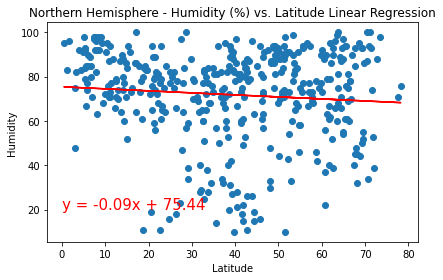

In [25]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("output_data/North_LatVsHumidity_regression_plot.png")
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.20032087049589484


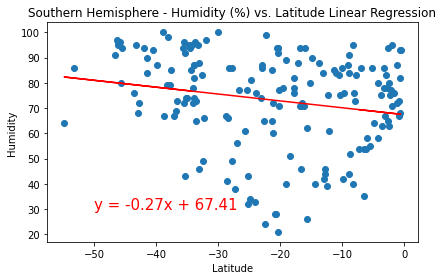

In [26]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Humidity"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("output_data/South_LatVsHumidity_regression_plot.png")
plt.tight_layout()
plt.show()

### North & Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression Insights

Both the regression plots show that there is no correlation between Latitude and Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.03553915847087977


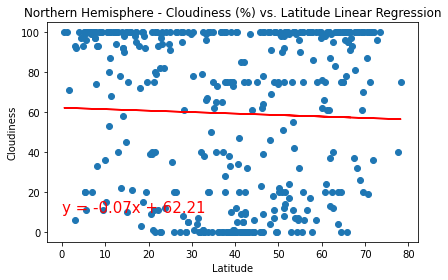

In [27]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig("output_data/North_LatVsCloudiness_regression_plot.png")
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.049715805855665395


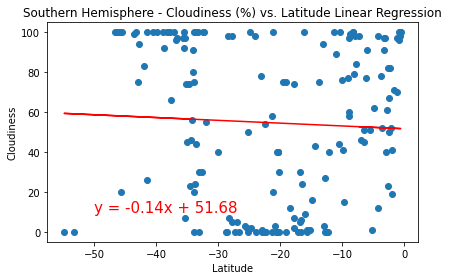

In [28]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Cloudiness"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig("output_data/South_LatVsCloudiness_regression_plot.png")
plt.tight_layout()
plt.show()

### North & Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Insights

Both the regression plots show that there is no correlation between Latitude and Cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05379771806005203


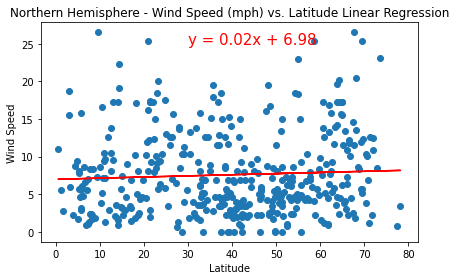

In [29]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig("output_data/North_LatVsWindSpeed_regression_plot.png")
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.14199530210012642


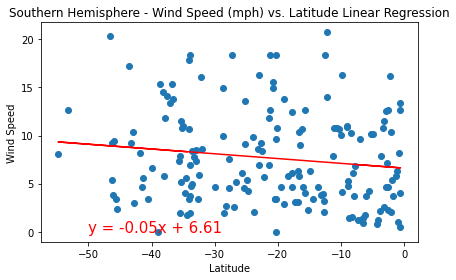

In [30]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Wind Speed"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(-50,0),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig("output_data/South_LatVsWindSpeed_regression_plot.png")
plt.tight_layout()
plt.show()

### Northern & Southern Hemispheres - Wind Speed (mph) vs. Latitude Linear Regression Insights

Both the regression plots show that there is no correlation between Latitude and Wind Speed.